In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import IPython
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

In [90]:
test=pd.read_csv('../input/test.csv')
train=pd.read_csv('../input/train.csv')
test.head()
#test.shape
#(1459,80)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [91]:
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
train_id=train['Id']
test_id=test['Id']
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [93]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'SalePrice Distribution')

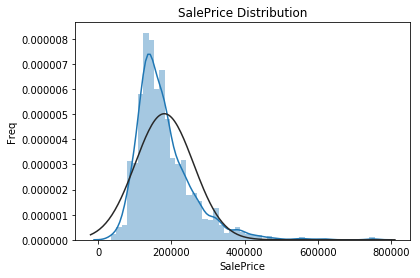

In [94]:
sns.distplot(train['SalePrice'],fit=norm)
plt.xlabel('SalePrice')
plt.ylabel('Freq')
plt.title('SalePrice Distribution')

Right Skewed Graph. But we want a normal distribution(model friendly)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'log(1+SalePrice) Distribution')

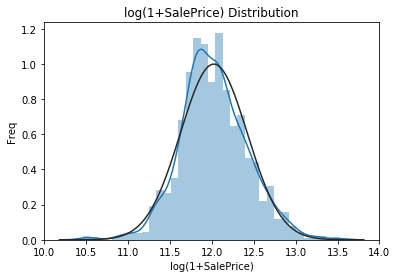

In [95]:
train['SalePrice']=np.log1p(train.SalePrice)
sns.distplot(train['SalePrice'],fit=norm)
plt.xlabel('log(1+SalePrice)')
plt.ylabel('Freq')
plt.title('log(1+SalePrice) Distribution')

## Feature Selection

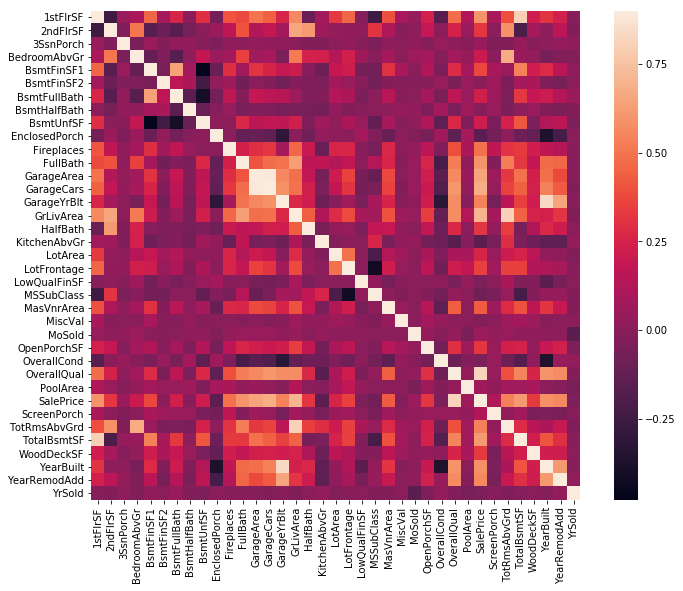

In [96]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train['SalePrice']
data= pd.concat((train,test),sort=True).reset_index(drop=True)
heat=data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(heat,vmax=0.9,square=True)

In [97]:
train_rows=train.shape[0]
test_rows=test.shape[0]
data.drop(['SalePrice'],axis=1,inplace=True)


In [98]:
data.isna().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageCond        159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
Electrical          1
Exterior2nd         1
KitchenQual         1
GarageCars          1
Exterior1st         1
GarageArea          1
TotalBsmtSF         1
                 ... 
GrLivArea           0
YearRemodAdd        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchS

In [99]:
cols_drop=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageFinish','GarageQual','GarageYrBlt','GarageCond','GarageType']
for col in cols_drop:
    data.drop(col,axis=1,inplace=True)
data.shape

(2919, 68)

In [100]:
data['MSSubClass'] = data['MSSubClass'].apply(str)


data['OverallCond'] = data['OverallCond'].astype(str)



data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [101]:
data.drop('Utilities',axis=1,inplace=True)

In [102]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'ScreenPorch',
       'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRem

In [103]:
from sklearn.preprocessing import LabelEncoder

In [105]:
#No Basement
data.BsmtQual =data.BsmtQual.fillna("NONE")
data.BsmtCond = data.BsmtCond.fillna("NONE")
data.BsmtFinType1=data.BsmtFinType1.fillna("NONE")
data.BsmtFinType2=data.BsmtFinType2.fillna("NONE")
data.BsmtFinSF1=data.BsmtFinSF1.fillna(0)
data.BsmtFinSF2=data.BsmtFinSF2.fillna(0)
data.BsmtExposure=data.BsmtExposure.fillna("NONE")
data.TotalBsmtSF=data.TotalBsmtSF.fillna(0)
data.BsmtFullBath=data.BsmtFullBath.fillna(0)
data.BsmtHalfBath=data.BsmtHalfBath.fillna(0)
data.BsmtUnfSF=data.BsmtUnfSF.fillna(0)
#NoGarage
data.GarageCars=data.GarageCars.fillna(0)
data.GarageArea=data.GarageArea.fillna(0)
#No Kitchen
data.KitchenQual=data.KitchenQual.fillna("NONE")
#functionality
data.Functional=data.Functional.fillna("Typ")
#Electrical. Most values are SBrkr
data.Electrical=data.Electrical.fillna("SBrkr")
#Exterior1st and Exterior2nd
data.Exterior1st=data.Exterior1st.fillna(data.Exterior1st.mode()[0])
#No Masonary Veneer Area
data.MasVnrArea=data.MasVnrArea.fillna(0)
data.MasVnrType=data.MasVnrType.fillna("NONE")
#MSZoning
data.MSZoning=data.MSZoning.fillna(data.MSZoning.mode()[0])
#SaleType
data.SaleType=data.SaleType.fillna(data.SaleType.mode()[0])

In [106]:
cols = ( 'BsmtQual', 'BsmtCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure','LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','1stFlrSF', '2ndFlrSF','TotalBsmtSF')
for col in cols:
    label=LabelEncoder()
    data[col]=label.fit_transform(list(data[col].values))
print(data.shape)


(2919, 67)


In [107]:
data=pd.get_dummies(data)
data.shape

(2919, 200)

In [108]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,...,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,197,356,0,3,4,4,706.0,0.0,2,6,1.0,0.0,2,150.0,1,0,4,2,0,2,6,548.0,2.0,1710,1,0,1,2,0,8450,3,0,10,196.0,0,4,61,4,7,2,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,563,0,0,3,4,1,978.0,0.0,0,6,0.0,1.0,2,284.0,1,0,4,3,1,2,6,460.0,2.0,1262,0,0,1,4,0,9600,3,0,5,0.0,0,7,0,7,6,2,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,254,365,0,3,4,2,486.0,0.0,2,6,1.0,0.0,2,434.0,1,0,4,2,1,2,6,608.0,2.0,1786,1,0,1,2,0,11250,0,0,10,162.0,0,11,42,4,7,2,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,292,283,0,3,1,4,216.0,0.0,0,6,1.0,0.0,4,540.0,1,272,4,3,1,1,6,642.0,3.0,1717,0,2,1,2,0,9550,0,0,11,0.0,0,4,35,4,7,2,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,462,479,0,4,4,0,655.0,0.0,2,6,1.0,0.0,2,490.0,1,0,4,2,1,2,6,836.0,3.0,2198,1,0,1,2,0,14260,0,0,10,350.0,0,3,84,4,8,2,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [109]:
num_features=data.dtypes[data.dtypes!="object"].index

In [110]:
#separating train and test dataset
train= data[:ntrain]
test=data[ntrain:]

In [111]:
dict(data.isna().sum())

{'1stFlrSF': 0,
 '2ndFlrSF': 0,
 '3SsnPorch': 0,
 'BedroomAbvGr': 0,
 'BsmtCond': 0,
 'BsmtExposure': 0,
 'BsmtFinSF1': 0,
 'BsmtFinSF2': 0,
 'BsmtFinType1': 0,
 'BsmtFinType2': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'BsmtQual': 0,
 'BsmtUnfSF': 0,
 'CentralAir': 0,
 'EnclosedPorch': 0,
 'ExterCond': 0,
 'ExterQual': 0,
 'Fireplaces': 0,
 'FullBath': 0,
 'Functional': 0,
 'GarageArea': 0,
 'GarageCars': 0,
 'GrLivArea': 0,
 'HalfBath': 0,
 'HeatingQC': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'LandSlope': 0,
 'LotArea': 0,
 'LotShape': 0,
 'LowQualFinSF': 0,
 'MSSubClass': 0,
 'MasVnrArea': 0,
 'MiscVal': 0,
 'MoSold': 0,
 'OpenPorchSF': 0,
 'OverallCond': 0,
 'OverallQual': 0,
 'PavedDrive': 0,
 'PoolArea': 0,
 'ScreenPorch': 0,
 'Street': 0,
 'TotRmsAbvGrd': 0,
 'TotalBsmtSF': 0,
 'WoodDeckSF': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'YrSold': 0,
 'BldgType_1Fam': 0,
 'BldgType_2fmCon': 0,
 'BldgType_Duplex': 0,
 'BldgType_Twnhs': 0,
 'BldgType_TwnhsE': 0,
 'Condition1_Artery

## Models

In [112]:
import xgboost as xgb
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

### Cross Validation

In [113]:
folds=4

def cross_v(model):
    k_fold=KFold(folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model,train.values,y_train,scoring="neg_mean_squared_error",cv=k_fold))
    return rmse

### lasso

In [114]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [115]:
elastic_net= make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005,l1_ratio=.9,random_state=3))

In [116]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

## Scoring

In [117]:
lasso_score= cross_v(lasso)
print("Lasso Score={:.4f} ".format(lasso_score.mean()))

Lasso Score=0.1301 


In [118]:
enet_score=cross_v(elastic_net)
print("Elastic Net Score={:.4f} ".format(enet_score.mean()))

Elastic Net Score=0.1299 


In [119]:
xgb_score=cross_v(model_xgb)
print("XGBoost Score={:.4f} ".format(xgb_score.mean()))

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBoost Score=0.1213 


## Final Training

In [120]:
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

In [121]:
model_xgb.fit(train,y_train)
train_pred= model_xgb.predict(train)
final_pred=np.expm1(model_xgb.predict(test))
print("Final rmse Score= {:.4f}".format(rmse(y_train,train_pred)))

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Final rmse Score= 0.0801


In [1]:
submission=pd.DataFrame()
submission['Id']=test_id
submission['SalePrice']=final_pred
submission.to_csv('submission.csv',index=False)

NameError: name 'pd' is not defined